In [1]:
# Import libraries and dependencies

import requests
import pandas as pd
import json
import csv
import datetime
from pathlib import Path


%matplotlib inline

In [2]:
# Read the hotspot rewards data & setting 'Date' as the index

hotspot_rewards_data = Path("../Data Collection/hotspot_rewards_past_30_days.csv")
hotspot_rewards = pd.read_csv(hotspot_rewards_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
hotspot_rewards.sort_index(ascending = True, inplace = True)
hotspot_rewards.head()


,obedient_metal_eel,striped_teal_baboon,huge_emerald_griffin,wide_beige_hornet,fast_burlap_aphid,original_peanut_snail,skinny_blue_sidewinder,high_beige_lobster,short_carrot_lemur,puny_tan_rhino,polite_brown_cormorant,creamy_mango_porcupine,trendy_caramel_dalmatian,clean_beige_cormorant,bright_syrup_lion,trendy_coal_ladybug,future_cloth_cormorant
Date,,,,,,,,,,,,,,,,,
2021-09-21,0.234824,0.118400,0.223289,0.252260,0.288320,0.005095,0.297691,0.363604,0.148374,0.217164,0.219697,0.009116,0.828401,0.015554,0.405270,0.017619,0.125404
2021-09-22,0.457459,0.116982,0.221716,0.668766,0.356974,0.000000,0.236347,0.464468,0.233402,0.044821,0.258936,0.005491,0.779938,0.016656,0.420068,0.011349,0.021769
2021-09-23,0.405852,0.048197,0.392919,0.512536,0.227731,0.000000,0.202569,0.313296,0.000000,0.187082,0.458625,0.011042,0.659462,0.005171,0.285723,0.005432,0.148168
2021-09-24,0.194611,0.184359,0.327805,0.454494,0.334107,0.000000,0.344651,0.304473,0.000000,0.089153,0.261301,0.004785,0.938051,0.011832,0.176574,0.015155,0.005599
2021-09-25,0.305266,0.093122,0.394234,0.432516,0.398784,0.000000,0.209247,0.229789,0.000000,0.063581,0.210134,0.004619,0.740385,0.009191,0.176766,0.016320,0.010486


In [3]:
# Calcualte Mean 
hotspot_rewards_mean = hotspot_rewards.mean()
hotspot_rewards_mean

obedient_metal_eel          0.451716
striped_teal_baboon         0.111104
huge_emerald_griffin        0.263633
wide_beige_hornet           0.312701
fast_burlap_aphid           0.193860
original_peanut_snail       0.017923
skinny_blue_sidewinder      0.172433
high_beige_lobster          0.123881
short_carrot_lemur          0.184385
puny_tan_rhino              0.098171
polite_brown_cormorant      0.160441
creamy_mango_porcupine      0.014859
trendy_caramel_dalmatian    0.584151
clean_beige_cormorant       0.014226
bright_syrup_lion           0.184978
trendy_coal_ladybug         0.010062
future_cloth_cormorant      0.064937
dtype: float64

In [4]:
# Calculate Returns
hotspot_rewards_returns = hotspot_rewards.pct_change()
hotspot_rewards_returns.head()

,obedient_metal_eel,striped_teal_baboon,huge_emerald_griffin,wide_beige_hornet,fast_burlap_aphid,original_peanut_snail,skinny_blue_sidewinder,high_beige_lobster,short_carrot_lemur,puny_tan_rhino,polite_brown_cormorant,creamy_mango_porcupine,trendy_caramel_dalmatian,clean_beige_cormorant,bright_syrup_lion,trendy_coal_ladybug,future_cloth_cormorant
Date,,,,,,,,,,,,,,,,,
2021-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,0.948092,-0.011972,-0.007044,1.651100,0.238119,-1.0,-0.206067,0.277401,0.573064,-0.793607,0.178603,-0.397655,-0.058501,0.070822,0.036514,-0.355851,-0.826406
2021-09-23,-0.112812,-0.587997,0.772170,-0.233610,-0.362051,NaN,-0.142917,-0.325474,-1.000000,3.173966,0.771192,1.011053,-0.154469,-0.689523,-0.319818,-0.521358,5.806283
2021-09-24,-0.520487,2.825122,-0.165719,-0.113245,0.467112,NaN,0.701404,-0.028163,NaN,-0.523456,-0.430251,-0.566664,0.422449,1.287962,-0.382009,1.789763,-0.962212
2021-09-25,0.568592,-0.494889,0.202648,-0.048357,0.193579,NaN,-0.392873,-0.245290,NaN,-0.286829,-0.195814,-0.034727,-0.210720,-0.223193,0.001085,0.076854,0.872795


In [5]:
# Calculate the daily standard deviation
hotspot_rewards_std = hotspot_rewards.std(axis=0)
hotspot_rewards_std

obedient_metal_eel          0.238205
striped_teal_baboon         0.052377
huge_emerald_griffin        0.123202
wide_beige_hornet           0.126763
fast_burlap_aphid           0.132293
original_peanut_snail       0.018773
skinny_blue_sidewinder      0.098339
high_beige_lobster          0.130284
short_carrot_lemur          0.143389
puny_tan_rhino              0.053169
polite_brown_cormorant      0.111049
creamy_mango_porcupine      0.011858
trendy_caramel_dalmatian    0.198690
clean_beige_cormorant       0.008508
bright_syrup_lion           0.121976
trendy_coal_ladybug         0.008199
future_cloth_cormorant      0.067983
dtype: float64

In [6]:
# Creating Bar Chart for new data
hotspot_rewards_data_2 = Path("../Data Collection/hotspot_rewards_analysis.csv")
hotspot_rewards_2 = pd.read_csv(hotspot_rewards_data_2)
hotspot_rewards_2.rename(columns={'Unnamed: 0':"Hotspot Names"}, inplace=True)
hotspot_rewards_2.set_index('Hotspot Names', inplace=True)
hotspot_rewards_2

,Mean,annual_rewards_in_USD,NPV
Hotspot Names,,,
obedient_metal_eel,0.451716,3608.537481,12028.458271
striped_teal_baboon,0.111104,887.559397,2958.531323
huge_emerald_griffin,0.263633,2106.033843,7020.112810
wide_beige_hornet,0.312701,2498.015566,8326.718555
fast_burlap_aphid,0.193860,1548.652464,5162.174880
original_peanut_snail,0.017923,143.179988,477.266626
skinny_blue_sidewinder,0.172433,1377.487143,4591.623812
high_beige_lobster,0.123881,989.625373,3298.751243
short_carrot_lemur,0.184385,1472.966603,4909.888675


In [9]:
hotspot_rewards_2_no_mean = hotspot_rewards_2.drop(['Mean'], axis=1)
hotspot_rewards_2_no_mean

,annual_rewards_in_USD,NPV
Hotspot Names,,
obedient_metal_eel,3608.537481,12028.458271
striped_teal_baboon,887.559397,2958.531323
huge_emerald_griffin,2106.033843,7020.112810
wide_beige_hornet,2498.015566,8326.718555
fast_burlap_aphid,1548.652464,5162.174880
original_peanut_snail,143.179988,477.266626
skinny_blue_sidewinder,1377.487143,4591.623812
high_beige_lobster,989.625373,3298.751243
short_carrot_lemur,1472.966603,4909.888675


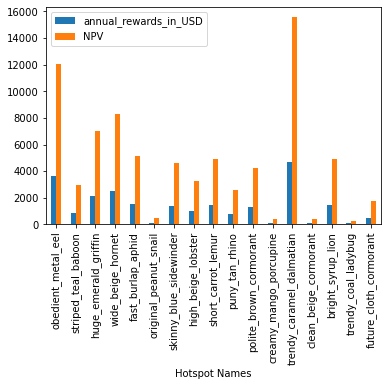

In [8]:
hotspot_rewards_2_no_mean_bar = hotspot_rewards_2_no_mean.plot(kind="bar")